In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [52]:
census_file = "../Data_Collection/Census_API/CensusDataFrameClean.csv"
county_pop_file = "../Data_Collection/FBI_API/SampleTestCounties.csv"
crime_file = "../Data_Collection/FBI_API/SampleTestCrimeData.csv"

census_df = pd.read_csv(census_file)
county_pop = pd.read_csv(county_pop_file)
crime_df = pd.read_csv(crime_file)

In [53]:
census_df["Name"] = list(map(lambda x: x.upper(), census_df['Name']))
census_df = census_df.rename(columns={"Name":"County"})



In [54]:
census_df.loc[census_df['County'] == "BLOUNT, ALABAMA"]

,Unnamed: 0,County,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployed Citizens,Men in Law-Enforcement,Women in Law-Enforcement,Law-Enforcement per 1000,Unemployment Rate (%)
66,66,"BLOUNT, ALABAMA",57704.0,40.8,46212.0,21033.0,9441.0,16.361084,1367.0,268.0,30.0,5.164287,2.368987


In [55]:
crime_df = crime_df.rename(columns={"COUNTYNAME":"County"})
crime_df

,County,crimes commited,cleared crimes
0,"BLOUNT, ALABAMA",3310,597
1,"BUTLER, ALABAMA",1349,529
2,"CHILTON, ALABAMA",2946,648
3,"COVINGTON, ALABAMA",1872,874
4,"CRENSHAW, ALABAMA",366,50
5,"ETOWAH, ALABAMA",8631,1031
6,"HENRY, ALABAMA",541,104
7,"JEFFERSON, ALABAMA",61497,9133
8,"LAWRENCE, ALABAMA",977,189
9,"MACON, ALABAMA",1405,64


In [57]:
census_sample = pd.merge(crime_df,census_df,on="County",how="inner")
census_sample

,County,crimes commited,cleared crimes,Unnamed: 0,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployed Citizens,Men in Law-Enforcement,Women in Law-Enforcement,Law-Enforcement per 1000,Unemployment Rate (%)
0,"BLOUNT, ALABAMA",3310,597,66,57704.0,40.8,46212.0,21033.0,9441.0,16.361084,1367.0,268.0,30.0,5.164287,2.368987
1,"BUTLER, ALABAMA",1349,529,68,20280.0,40.6,34315.0,19011.0,5126.0,25.276134,849.0,88.0,40.0,6.311637,4.186391
2,"CHILTON, ALABAMA",2946,648,72,43817.0,38.7,42594.0,22045.0,8779.0,20.035603,1520.0,226.0,0.0,5.157815,3.468973
3,"COVINGTON, ALABAMA",1872,874,81,37729.0,42.9,37313.0,21738.0,7031.0,18.635532,1723.0,110.0,68.0,4.717856,4.566779
4,"CRENSHAW, ALABAMA",366,50,82,13896.0,41.6,37557.0,20455.0,2484.0,17.875648,452.0,34.0,2.0,2.590674,3.252735
5,"ETOWAH, ALABAMA",8631,1031,89,103363.0,40.9,40478.0,21287.0,18713.0,18.104157,3837.0,375.0,21.0,3.831158,3.712160
6,"HENRY, ALABAMA",541,104,95,17187.0,43.2,41045.0,22825.0,2586.0,15.046256,574.0,32.0,33.0,3.781928,3.339734
7,"JEFFERSON, ALABAMA",61497,9133,98,659096.0,37.5,47220.0,28162.0,116750.0,17.713656,26632.0,1720.0,377.0,3.181631,4.040686
8,"LAWRENCE, ALABAMA",977,189,101,33433.0,42.2,42339.0,21911.0,6050.0,18.095893,1145.0,96.0,26.0,3.649089,3.424760
9,"MACON, ALABAMA",1405,64,105,19684.0,38.2,32390.0,18385.0,4442.0,22.566552,1344.0,143.0,55.0,10.058931,6.827881


Text(0.5, 0, 'Law Enforcement Workers per 1000')

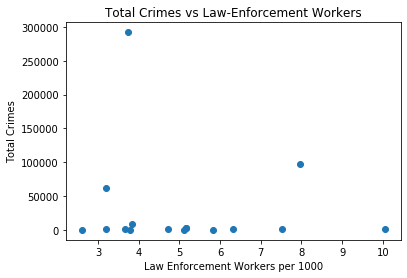

In [58]:
plt.scatter(x=census_sample['Law-Enforcement per 1000'],y=crime_df["crimes commited"])

plt.title('Total Crimes vs Law-Enforcement Workers')
plt.ylabel("Total Crimes")
plt.xlabel("Law Enforcement Workers per 1000")